In [3]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2


# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json
import datetime
import pickle


# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 10)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
from multiprocessing import cpu_count
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
# import ffn


# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')
#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

RANDOM_STATE = 777

print()

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2024-09-03T12:05:35.165400-04:00

Python implementation: CPython
Python version       : 3.8.19
IPython version      : 8.12.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



/var/folders/j0/8v9qcjfx15g5ftmsy5n0qrq80000gn/T/ipykernel_19691/2173331131.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [4]:
import os

# Run the setup script
%run ../../config/setup_project.py

# Call the function to set up the project path
setup_project_path()

# Now you can import your modules
from src.utils import helper as h_
import src.ch_02.code_ch_02 as f_ch2
import src.ch_03.code_ch_03 as f_ch3
import src.ch_04.code_ch_04 as f_ch4
import src.ch_05.code_ch_05 as f_ch5
import src.ch_06.code_ch_06 as f_ch6


Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management
Config path added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config
Current sys.path: ['/Users/paulkelendji/miniconda3/envs/financial_math/lib/python38.zip', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/lib-dynload', '', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages/setuptools/_vendor', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config', '/Users/paulkelendji/Desktop/GitHub_paul']


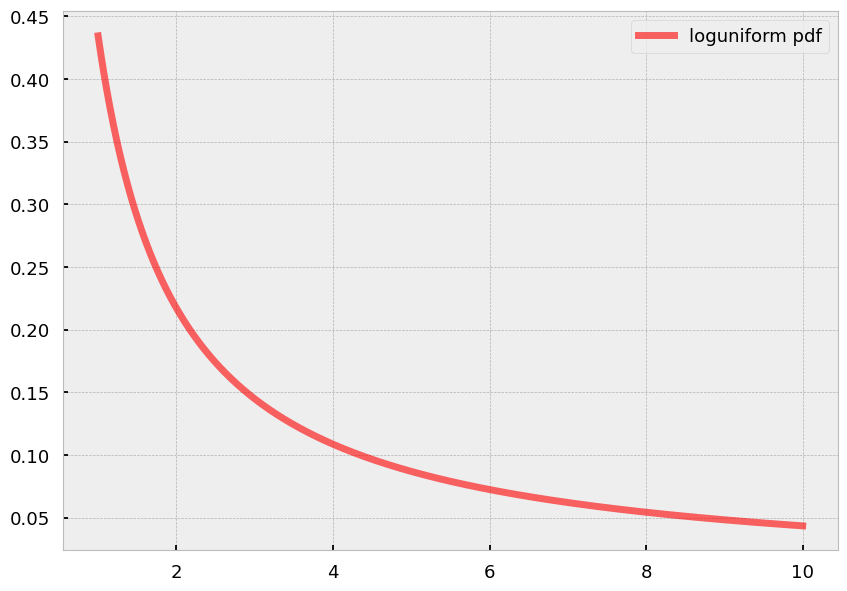

In [9]:
# plotting pdf of log-uniform distribution

from scipy.stats import uniform
from scipy.stats import loguniform

a, b = 1e0, 1e1
fig, ax = plt.subplots(1, 1)
x = np.linspace(a, b, 1000)
y = loguniform.pdf(x, a, b)
ax.plot(x, y, 'r-', lw=5, alpha=0.6, label='loguniform pdf')
plt.legend()
plt.show()


KstestResult(statistic=0.00713966242284414, pvalue=0.6850917133683572, statistic_location=-3.800098997874414, statistic_sign=-1)
count    10000.000000
mean        73.825625
std        176.870677
min          0.001004
25%          0.032896
50%          1.031617
75%         33.707568
max        997.912109
dtype: float64


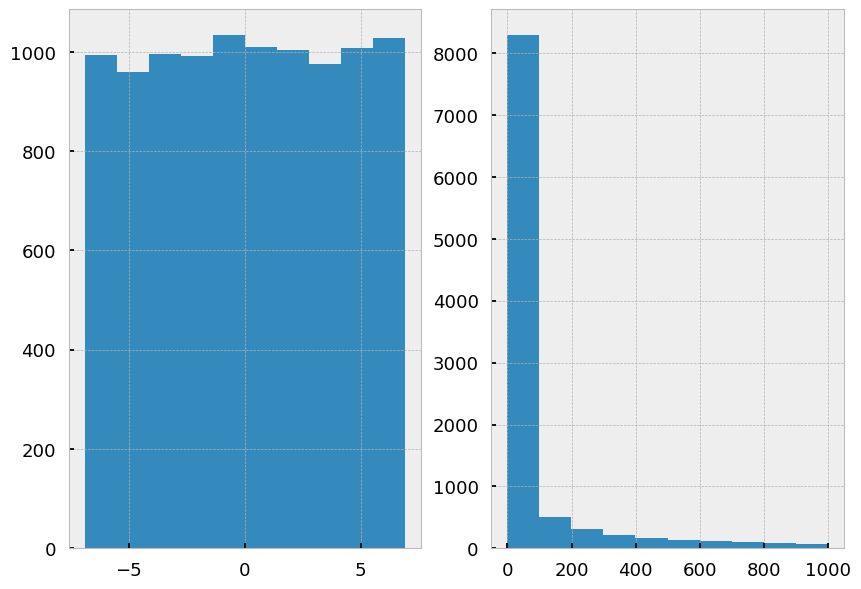

In [10]:
### SNIPPET 9.4 THE `logUniform_gen` CLASS

import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
from scipy.stats import rv_continuous, kstest

# _________________________________________________________
class logUniform_gen(rv_continuous):
    # random numbers log-uniformly distributed between 1 and e
    def _cdf(self, x):
        return np.log(x/self.a)/np.log(self.b/self.a)

def logUniform(a=1, b=np.exp(1)): 
    return logUniform_gen(a=a, b=b, name='logUniform')
# _________________________________________________________
a, b, size = 1E-3, 1E3, 10000
vals = logUniform(a=a, b=b).rvs(size=size)
print(kstest(rvs=np.log(vals), cdf='uniform', args=(np.log(a), np.log(b/a)), N=size))
print(pd.Series(vals).describe())
mpl.subplot(121)
pd.Series(np.log(vals)).hist()
mpl.subplot(122)
pd.Series(vals).hist()
mpl.show()


# NOTES ON `scipy.stats.rv_continuous`

The `rv_continuous` class in `scipy.stats` is a base class for creating custom continuous random variables in Python. It provides a framework for defining custom probability distributions by specifying methods like the cumulative distribution function (CDF) and probability density function (PDF).

### Understanding the `logUniform_gen` Class

In the provided snippet, the `logUniform_gen` class is a custom random variable that generates log-uniformly distributed random numbers. A log-uniform distribution means that the logarithm of the variable is uniformly distributed. This distribution is useful in scenarios where the range of the variable spans several orders of magnitude.

#### Breaking Down the Code

1. **Class Definition (`logUniform_gen`):**
   - The class `logUniform_gen` inherits from `rv_continuous`.
   - The `_cdf` method is overridden to define the cumulative distribution function (CDF) for a log-uniform distribution.

2. **Custom CDF (`_cdf` method):**
   - The CDF for a log-uniform distribution is defined as:
     \[
     F(x) = \frac{\log(x/a)}{\log(b/a)}
     \]
   - Here, `a` and `b` are the lower and upper bounds of the distribution, respectively.
   - The function returns the CDF, which is used internally by `scipy.stats` to generate random variables, calculate probabilities, etc.

3. **Creating an Instance of `logUniform_gen`:**
   - The function `logUniform` is a convenience function that creates an instance of `logUniform_gen` with specified bounds `a` and `b`.
   - By default, it generates random variables between `1` and `e` (approximately 2.718).

4. **Generating Random Variables:**
   - `vals = logUniform(a=a, b=b).rvs(size=size)` generates `size` random variables from the log-uniform distribution with the specified `a` and `b`.
   - The generated values are stored in `vals`.

5. **Testing the Distribution (Kolmogorov-Smirnov Test):**
   - The `kstest` function performs a Kolmogorov-Smirnov test to check if the log-transformed `vals` follow a uniform distribution. This test checks if the log of `vals` is uniformly distributed between `log(a)` and `log(b)`.

6. **Descriptive Statistics and Visualization:**
   - `pd.Series(vals).describe()` provides summary statistics for the generated values.
   - Two histograms are plotted:
     - The first histogram shows the distribution of the log-transformed values (`np.log(vals)`).
     - The second histogram shows the distribution of the original values (`vals`).

### How `rv_continuous` Works

The `rv_continuous` class is a template for creating continuous random variables. When you subclass `rv_continuous`, you can override various methods like:
- **_pdf(self, x)**: Defines the probability density function.
- **_cdf(self, x)**: Defines the cumulative distribution function.
- **_ppf(self, q)**: Defines the percent-point function (inverse of CDF).
- **_rvs(self, size)**: Defines how to generate random samples.

### Example: Creating a Custom Distribution

Here's an example of creating a custom triangular distribution:

```python
import numpy as np
from scipy.stats import rv_continuous

class customTriangular_gen(rv_continuous):
    def _cdf(self, x):
        # Triangular CDF for x in [0, 1] with mode at 0.5
        return np.where(x < 0.5, 2*x**2, 1 - 2*(1-x)**2)

# Instantiate the distribution
customTriangular = customTriangular_gen(name='customTriangular')

# Generate random variables
vals = customTriangular.rvs(size=10000)

# Plotting
import matplotlib.pyplot as plt
plt.hist(vals, bins=50, density=True)
plt.title('Custom Triangular Distribution')
plt.show()
```

This example shows how to create a custom triangular distribution with a mode at 0.5, and how to generate random samples from it.

### Summary

- **`rv_continuous`**: Base class for defining custom continuous distributions.
- **Custom Distribution**: Define the `_cdf`, `_pdf`, or other methods to create your custom distribution.
- **`logUniform_gen`**: Generates random numbers from a log-uniform distribution, useful for generating numbers across several orders of magnitude. 

This approach is highly customizable and can be adapted to create various kinds of distributions by defining the necessary methods.

---

So the only method "rv_continuous" needs to simulate a random variable is _cdf? What else can it use? And how does it simulate?

---

The `rv_continuous` class in `scipy.stats` is a flexible and powerful tool for creating custom continuous random variables. While the `_cdf` method is crucial, it's not the only method you can or should implement. The class has several methods you can override depending on what you want your custom distribution to do. Here’s a more detailed look:

### Key Methods You Can Override

1. **_pdf (Probability Density Function)**
   - Defines the probability density function of the distribution.
   - If you provide this, `rv_continuous` can numerically integrate it to get the CDF.
   - Example:
     ```python
     def _pdf(self, x):
         return 3 * x**2  # Example for a PDF of x^3 on [0,1]
     ```

2. **_cdf (Cumulative Distribution Function)**
   - Defines the cumulative distribution function.
   - This is often the most important method because if you provide the CDF, `rv_continuous` can invert it to generate random variables.
   - Example:
     ```python
     def _cdf(self, x):
         return x**3  # Example CDF for x^3 on [0,1]
     ```

3. **_ppf (Percent Point Function or Inverse CDF)**
   - Defines the inverse of the CDF, which is essential for generating random variables (using inverse transform sampling).
   - If you don’t provide it, `rv_continuous` can numerically invert the CDF, but it's often more efficient to provide your own.
   - Example:
     ```python
     def _ppf(self, q):
         return q**(1/3)  # Inverse of the CDF x^3
     ```

4. **_rvs (Random Variates)**
   - Directly defines how to generate random samples. This is useful if you have a more efficient way of generating random samples than using the inverse CDF method.
   - Example:
     ```python
     def _rvs(self, size=None, random_state=None):
         return np.random.beta(2, 2, size=size)  # Generate random samples from a beta distribution
     ```

5. **_stats (Moments)**
   - Computes the mean, variance, skew, and kurtosis of the distribution.
   - Providing this can make other methods (like calculating moments) more efficient.
   - Example:
     ```python
     def _stats(self):
         return 0.5, 1/12, 0, -1.2  # Mean, variance, skew, and kurtosis
     ```

### How Does `rv_continuous` Simulate Random Variables?

The `rv_continuous` class uses inverse transform sampling as the default method to generate random variables:

1. **Inverse Transform Sampling**:
   - It first generates uniform random numbers `U` between 0 and 1.
   - Then, it applies the inverse of the CDF (the PPF function) to transform these uniform numbers into numbers that follow the desired distribution.
   - If you provide the `_ppf` method, it uses that; otherwise, it numerically inverts the CDF you provided using the `_cdf` method.

2. **Direct Simulation**:
   - If you provide a custom `_rvs` method, it will directly use that to generate the random samples. This is often faster and more efficient for complex distributions where the CDF or its inverse is difficult to compute.

### Example: Custom Distribution with All Methods

```python
import numpy as np
from scipy.stats import rv_continuous

class customDist_gen(rv_continuous):
    def _pdf(self, x):
        return 3 * x**2  # Example PDF: 3x^2 on [0,1]

    def _cdf(self, x):
        return x**3  # Corresponding CDF: x^3 on [0,1]

    def _ppf(self, q):
        return q**(1/3)  # Inverse CDF: x = q^(1/3)

    def _rvs(self, size=None, random_state=None):
        return np.random.beta(2, 2, size=size)  # Just an example using beta distribution

    def _stats(self):
        mean = 0.75  # Mean of 3x^2 on [0,1]
        variance = 0.0625  # Variance of 3x^2 on [0,1]
        skewness = 0  # Skewness
        kurtosis = -1.2  # Kurtosis
        return mean, variance, skewness, kurtosis

customDist = customDist_gen(name='customDist')

# Generate random samples
samples = customDist.rvs(size=10000)

# Plotting
import matplotlib.pyplot as plt
plt.hist(samples, bins=50, density=True)
plt.title('Custom Distribution Samples')
plt.show()
```

### Summary

- **_cdf**: Crucial for defining the distribution, especially for cumulative distribution function-based simulations.
- **_pdf**: Defines the probability density function, helpful if you want to describe the likelihood of individual outcomes.
- **_ppf**: Inverse CDF, important for efficient random number generation.
- **_rvs**: Directly define how to generate random samples.
- **_stats**: Provides moments like mean and variance, improving performance for certain computations.

The `rv_continuous` class gives you a flexible way to define and simulate any continuous distribution by customizing these methods.